Terry Boo Chee Yee, Li Sheng | P2211194, P2309110 | DAAA/FT/2B/22 | Deep Learning CA2 - Part A (GAN)

<h1><Center>Generative Adverserial Network</Center></h1>

# Progression (Delete after finish with part A)


## Done

###### EDA
- Check for unique classes in the dataset
- Plotted sample images with it's label
- Plotted number of image in each class
- Check if there are images with contsant pixel values (image that appears completely uniform or monochromatic, lacking any discernible features, textures, or details)
- Class where the constant pixel images belong to
- Check for duplicated images
- Cleaned the dataset by removing the '-1' and use a bar graph to show the number of images in each class
###### Preprocessing
- Getting original, normalized and binarized versions of the images
- Data augmentation
- Enhancing Image using processing techniques
###### Modelling
- BASE DCGAN (Completed)
- DCGAN with stridded convolutions
- CGAN


## To do

- Duplicated images (Pixel Values are the same)
- Deal with black images in class '-1' (Done: Decided to drop them)
- Deal with contant pixel images
- Deal with mislabeled images

# Overview

We developed a Generative Adversarial Network (GAN) model designed to create 260 small black-and-white images. The process began with exploratory data analysis (EDA) and dataset cleaning. Subsequently, we pre-processed the data to prepare it for training the model.

__Data Cleaning Process__

__Preprocessing Process__

# Considerations for GANs

__If you are asked to generate images of a specific class, propose a way of doing it__

We can use [Conditional GAN (CGAN)](#7)

__If you are asked to generate coloured images instead of black-and-white ones, do you think it would be easier or harder to produce better quality results__

__What class(es) is/are relatively easier/harder to generate? Why?__


# Table of contents

- [1. Background](#1)
- [2. Set Up](#2)
  - [2.1 Importing Libraries](#2.1)
  - [2.2 Loading the Dataset](#2.2)
- [3. Exploratory Data Analysis](#3)
  - [3.1 Shape of the Data](#3.1)
  - [3.2 Identify Images with Uniform Pixel Values](#3.2)
  - [3.3 Unique Classes in the Dataset](#3.3)
  - [3.4 Sample Images From Each Class](#3.4)
  - [3.5 Number of Images in Each Class](#3.5)
  - [3.6 Pixel Variability in Each Class](#3.6)
- [4. Data Cleaning](#4)
  - [4.1 Excluding Images with Constant Pixel Values](#4.1)
- [5. Data Preprocessing](#5)
  - [5.1 Flipping the Images Upright](#5.1)
  - [5.2 Normalizing the Images](#5.2)
  - [5.3  Data Augmentation](#5.3)
- [6. Evaluation Metrics](#6)
  - [6.1 Loss (Generator Loss and Discriminator Loss)](#6.1)
  - [6.2 Accuracy (Discriminator Accuracy)](#6.2)
- [7. Deep Convolutional GAN (DCGAN)](#7)
  - [7.1 Base Model (DCGAN)](#7.1)
  - [7.2 Improving the Discriminator](#7.2)
  - [7.3 Using ReLU for The Generator's Activation Function](#7.3)
  - [7.4 Adding More Dense Units to The Generator](#7.4)
- [8. Conditional GAN (CGAN)](#8)
  - [8.1 Base Model (CGAN)](#8.1)
  - [8.2 Decreasing Leaky Relu Alpha Value](#8.2)
  - [8.3 Increase ADAM Value](#8.3)
  - [8.4 Remove Batch Notrmalization Layer](#8.4)
  - [8.5 Add more layers to the discriminator](#8.5)
- [8. Wasserstein GAN (WGAN)](#8)
  - [8.1 Base Model (WGAN)](#8.1)

# Background <a id = '1'></a>

__Task__

We are working on a project to create 260 small black-and-white images

__What are GANs__

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.

__Main components of GAN__

- Discriminator

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from the data created by the generator. It could use any network architecture appropriate to the type of data it's classifying.

- Generator

The generator part of a GAN learns to create fake data by incorporating feedback from the discriminator. It learns to make the discriminator classify its output as real.

__How Gan works__

First, the generator creates samples from random noise inputs and feeds these generated samples into the discriminator. The discriminator then tries to classify whether each sample is real (from the actual data distribution) or generated (fake).

__References__

https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/

https://developers.google.com/machine-learning/gan/gan_structure

# Set Up <a id = '2'></a>

## Importing Libraries <a id = '2.1'></a>

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import random
import os
import shutil
import tensorflow as tf
import math
from PIL import Image
from collections import Counter
import cv2

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utility  Libraries
from sklearn.utils import resample
from tensorflow.keras.utils import Sequence
import tensorflow.keras.utils as image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory

# Pre-Processing Libraries
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

# Model Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

#Layers Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

#Callback Libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Optimizer Libraries 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Evaluation Libraries
from sklearn.metrics import classification_report
from visualkeras import layered_view
from sklearn.metrics import confusion_matrix

# ignore warnings
import pickle
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset <a id = '2.2'></a>

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('emnist-letters-train.csv', header=None)
df.head()

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   16    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   15    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   23    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]

# Exploratory Data Analysis <a id = '3'></a>

In [3]:
df_eda = df.copy()
# A function to map the labels from numbers to alphabets
def map_labels(x):
    label_map = {
        -1: '-1', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 
        6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 
        11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 
        16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 
        21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'
    }

    if isinstance(x, str) and len(x) < 3:
        # If the label is already mapped and is a single character, return it as is
        return x
    else:
        return label_map.get(x)

# Applying mapping to the first column and convert to string
df_eda[0] = df_eda[0].apply(map_labels).astype(str)
df_eda.head()

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   W    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   G    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2   P    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   O    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   W    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]

## Shape of the Data <a id = '3.1'></a>

In [4]:
# Convert DataFrame to NumPy array
data = df_eda.values
# Check the shape of the data
print("Shape of data array:", data.shape)

Shape of data array: (99040, 785)


#### Results

This dataset comprises 99,040 images with 785 columns, where the first column represents the class label, and the subsequent columns contain pixel values.

## Identify Images with Uniform Pixel Values <a id = '3.2'></a>

__What is uniform pixel values__

Images with uniform pixel values are those where all the pixel values are the same across the entire image

__What uniform pixel values results in__

Uniform pixel values result in an image that is a single, solid color with no variation or detail, which may not provide any useful information for analysis or training.

In [5]:
def is_constant_image(row):
    pixel_values = row.iloc[1:].values 
    # If the rest of the pixel values is the same as the first pixel value
    return np.all(pixel_values == pixel_values[0])

In [6]:
# Apply the function to each row and filter for constant pixel value rows
constant_images = df_eda[df_eda.apply(is_constant_image, axis=1)]

print(f"Number of constant pixel value images: {constant_images.shape[0]}")


# Retrieve unique class labels for constant pixel value images
unique_constant_pixel_class = np.unique(constant_images.iloc[:, 0].values)


print(f'Class labels for images with constant pixel values: {unique_constant_pixel_class}')

Number of constant pixel value images: 10240
Class labels for images with constant pixel values: ['-1']


In [7]:
no_minus_one_images = len(df_eda[df_eda.iloc[:, 0] == '-1'])  # Counting rows where the first column equals '-1'

print(f'Number of images in the \'-1\' class: {no_minus_one_images}')

Number of images in the '-1' class: 10240


#### Results

The dataset includes 10,240 images with uniform pixel values, all categorized under the '-1' class.

Since there are 10,240 images in the '-1' class, all the images in the '-1' class are images with uniform pixel values

We will take note of the images with uniform pixel values during the [Data Cleaning](#4) process

## Unique Classes in the Dataset <a id = '3.3'></a>

In [8]:
# Extract the first column
classes = data[:, 0]

# Get unique classes
unique_classes = np.unique(classes)

# Print the unique classes array
print("Unique classes array:")
print(unique_classes)

Unique classes array:
['-1' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q'
 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


#### Results

The Dataset contains images images of A - Z class and there is a '-1' class.

## Sample Images From Each Class <a id = '3.4'></a>

In [9]:
def plot_random_images_per_class_from_dataframe(df, image_size, num_images_per_row=5):
    # Extract labels and pixel data
    labels = df.iloc[:, 0]  # Assuming the first column contains labels
    pixel_data = df.iloc[:, 1:]  # Assuming pixel data starts from the second column

    # Reshape pixel data into images
    num_images = len(df)
    images = pixel_data.values.reshape(num_images, image_size, image_size)

    # Get unique classes and sort them alphabetically
    unique_classes = sorted(labels.unique())

    # Calculate number of rows needed for subplots
    num_classes = len(unique_classes)
    num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row  # Equivalent to ceil(num_classes / num_images_per_row)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(num_images_per_row * 2, num_rows * 2))

    # Plot random image from each class
    for i, cls in enumerate(unique_classes):
        class_indices = labels[labels == cls].index
        cls = map_labels(cls)
        random_index = random.choice(class_indices)
        row = i // num_images_per_row
        col = i % num_images_per_row
        axes[row, col].imshow(images[random_index], cmap='gray')
        axes[row, col].set_title(f'Class {cls}')
        axes[row, col].axis('off')

    # Hide any extra subplots if num_classes is not a multiple of num_images_per_row
    for j in range(num_classes, num_rows * num_images_per_row):
        axes.flatten()[j].axis('off')

    plt.tight_layout()
    plt.show()

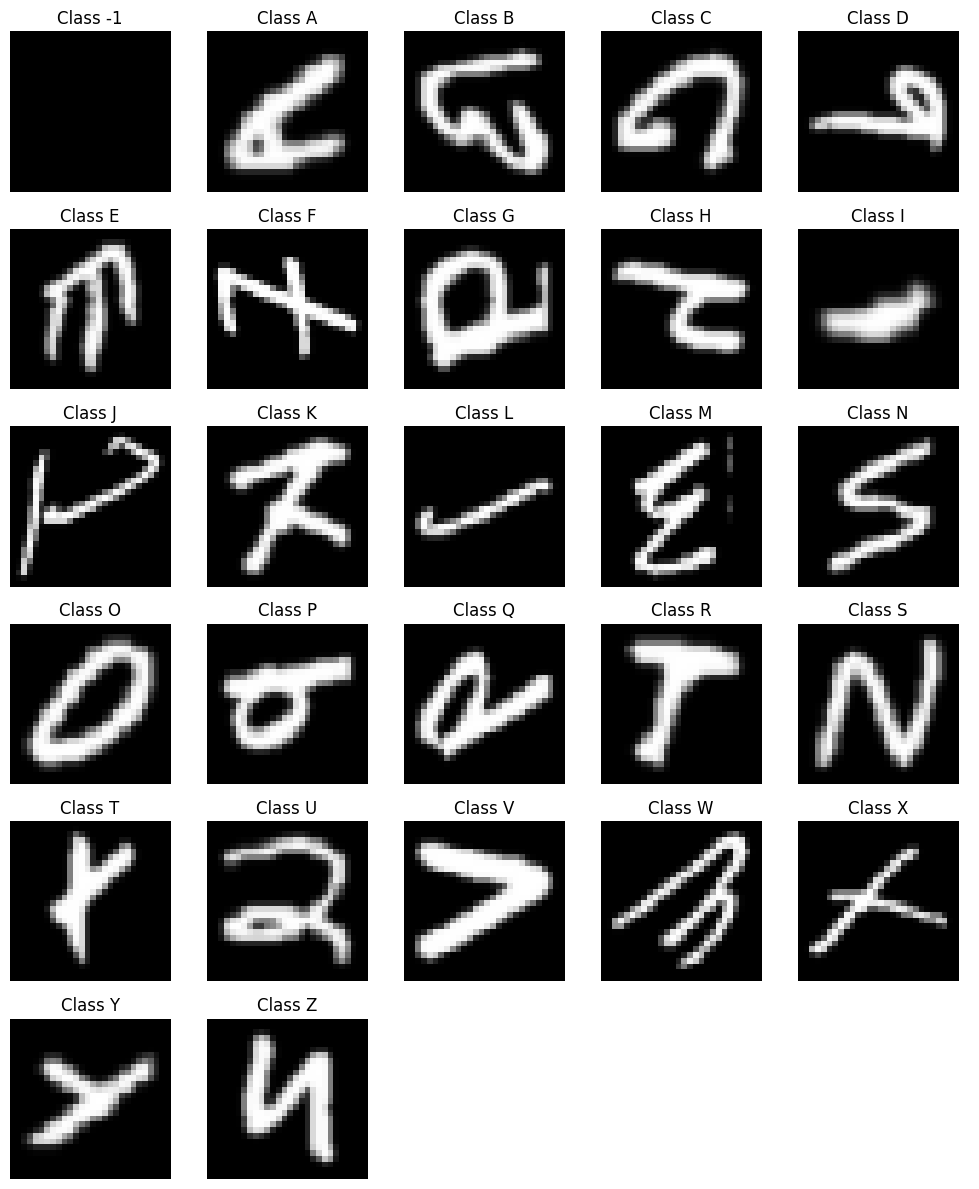

In [10]:
plot_random_images_per_class_from_dataframe(df_eda, image_size=28, num_images_per_row=5)

#### Results

Looks like the images are representing their labels correctly, but they are not oriented in an upright position. In addition, the '-1' class contains images of solid colors

## Number of Images in Each Class <a id = '3.5'></a>

In [11]:
def count_images_per_class(data):
    # Extract classes from the first column
    classes = data.iloc[:, 0]

    # Get unique classes and count occurrences
    unique_classes, counts = np.unique(classes, return_counts=True)

    # Create a dictionary to store class counts
    class_counts = dict(zip(unique_classes, counts))

    return class_counts

In [12]:
def plot_class_distribution(data):
    classes = data.iloc[:, 0]

    # Check if the classes are numerical and need mapping
    if classes.apply(lambda x: isinstance(x, int)).all():
        # Map numerical labels to alphabet labels
        mapped_classes = classes.apply(map_labels)
    else:
        mapped_classes = classes

    # Get unique classes and count occurrences
    unique_classes, counts = np.unique(mapped_classes, return_counts=True)

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.bar(unique_classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Class')
    plt.xticks(unique_classes)
    plt.show()

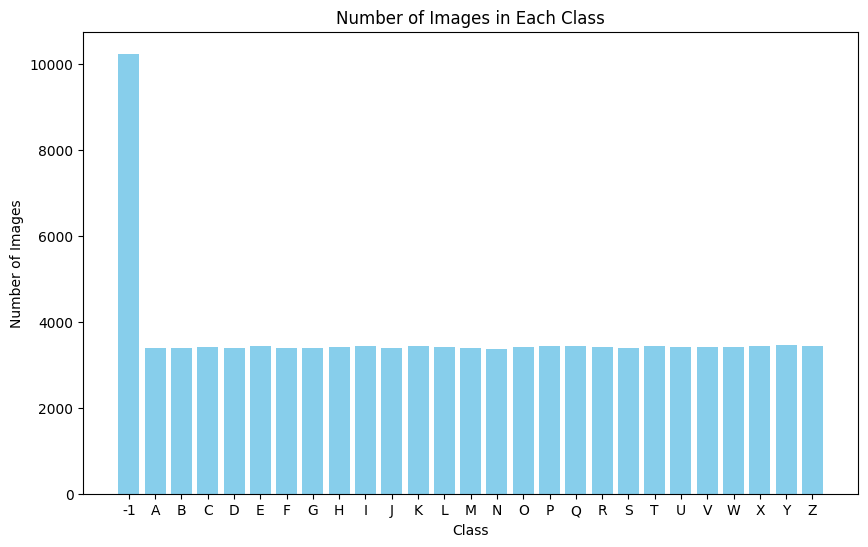

In [13]:
plot_class_distribution(df_eda)

#### Results

There are approximately 10,000 images in the '-1' class, whereas the other classes each have around 3,700 images.

## Pixel Variability in Each Class <a id = '3.6'></a>

__What is pixel variability__

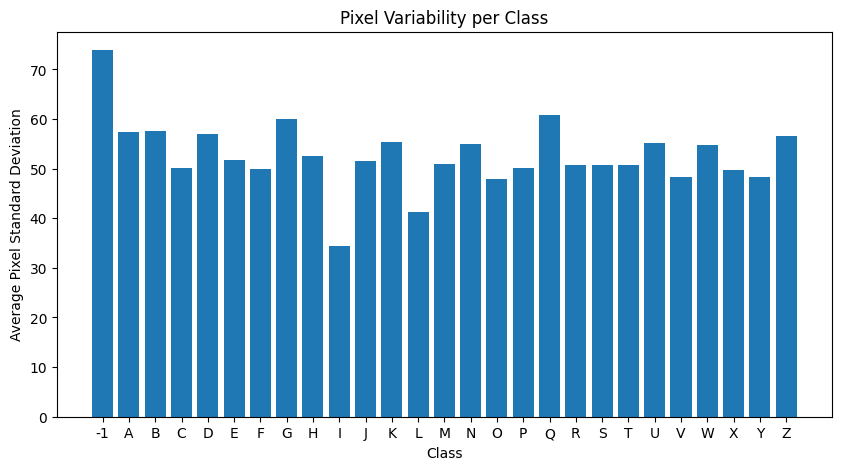

In [14]:
# Extract labels and pixel data
labels = df_eda.iloc[:, 0]  # Assuming the first column contains labels
pixel_data = df_eda.iloc[:, 1:]  # Assuming pixel data starts from the second column

# Get unique classes and sort them alphabetically
unique_classes = sorted(labels.unique())

# Initialize a dictionary to store standard deviation for each class
std_per_class = {}

# Calculate standard deviation for each class
for cls in unique_classes:
    class_indices = labels[labels == cls].index
    class_pixel_data = pixel_data.loc[class_indices]
    std_per_class[cls] = class_pixel_data.values.std(axis=0).mean()

# Plotting the pixel variability
plt.figure(figsize=(10, 5))
plt.bar(std_per_class.keys(), std_per_class.values())
plt.xlabel('Class')
plt.ylabel('Average Pixel Standard Deviation')
plt.title('Pixel Variability per Class')
plt.show()

# Data Cleaning <a id = '4'></a>

## Excluding Images with Constant Pixel Values <a id = '4.1'></a>

Number of images after removing blank images: 88800


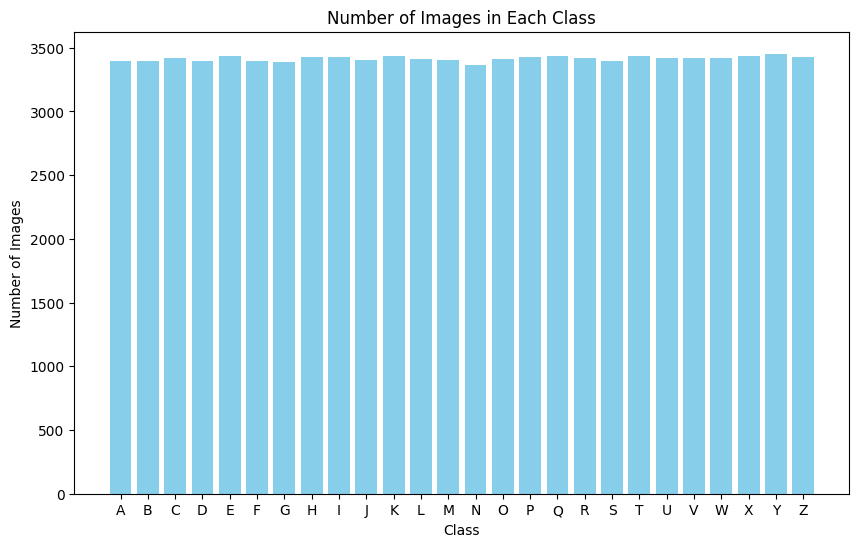

In [15]:
# Duplicate DF
cleaned_df = df.copy()

# Filtering
cleaned_df = cleaned_df[cleaned_df.iloc[:, 0] != -1]

# Print the number of images after removing blank images
print(f'Number of images after removing blank images: {cleaned_df.shape[0]}')
plot_class_distribution(cleaned_df)

# Data Preprocessing <a id = '5'></a>

## Flipping the Images Upright <a id = '5.1'></a>

We have realised that the images are flipped vertically and are roateted 90 degree anti clockwise

In [16]:
# Define a function to reshape and process images
def process_image(row):
    label = row[0] 
    pixels = np.array(row[1:], dtype=np.uint8) 
    image = pixels.reshape(28, 28)  # Reshape to original image dimensions (assuming 28x28)
    return label, image

# Flip vertically and rotate 90 degrees using cv2
def flip_and_rotate(image):
    # Flip vertically
    flipped_image = cv2.flip(image, 0)
    # Rotate 90 degrees clockwise
    rotated_image = cv2.rotate(flipped_image, cv2.ROTATE_90_CLOCKWISE)
    return rotated_image.flatten()

# Process each row in the dataframe
processed_images = []
for index, row in cleaned_df.iterrows():
    label, image = process_image(row)
    processed_image = flip_and_rotate(image)
    processed_images.append((label, processed_image))

# Convert processed images back to dataframe if needed
upright_image_df = pd.DataFrame(processed_images, columns=['Label', 'Processed_Image'])

# Convert the pixels to columns
upright_image_df_pixels = upright_image_df['Processed_Image'].apply(pd.Series)

# Rename columns
upright_image_df_pixels.columns = [f'{i+1}' for i in range(len(upright_image_df_pixels.columns))]

# Concatenate Label column with the new pixel columns
upright_image_df = pd.concat([upright_image_df['Label'], upright_image_df_pixels], axis=1)

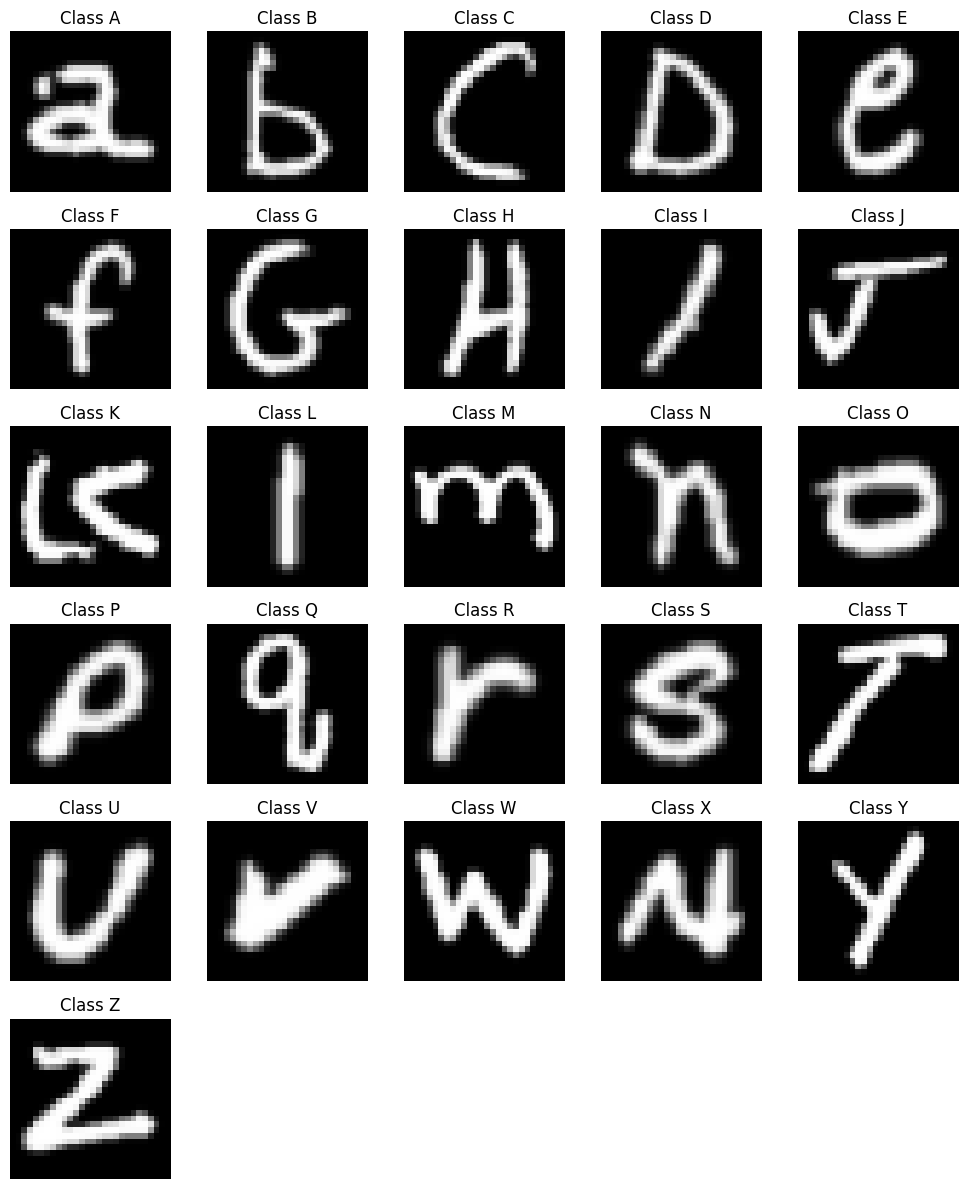

In [17]:
plot_random_images_per_class_from_dataframe(upright_image_df, image_size=28, num_images_per_row=5)

## Normalizing the Images <a id = '5.2'></a>

In [18]:
# Convert DataFrame to NumPy array
data = upright_image_df.values

# Assuming each image is 28x28 pixels and the remaining columns are pixel values
image_size = 28
num_images = data.shape[0]

# Extract labels and pixel data
labels = data[:, 0]
pixel_data = data[:, 1:]

# Extract pixel data and reshape each row into a 28x28 array
original_images = data[:, 1:].reshape(num_images, image_size, image_size).astype(np.uint8)

# Normalize pixel values
normalized_images = original_images / 255.0

# Flatten the normalized images back to rows
flattened_normalized_images = normalized_images.reshape(num_images, -1)

# Combine labels and flattened normalized images
combined_data = np.column_stack((labels, flattened_normalized_images))

# Create a new dataframe with the combined data
normalized_df = pd.DataFrame(combined_data, columns=cleaned_df.columns)

# Display the first few rows of the new dataframe
normalized_df

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0      23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
88795  26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
88796  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
88797  18.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
88798  24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
88799  19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       778  779  780  781  782  783  784  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
88795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88796  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88797  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88798  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
88799  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[88800 rows x 785 columns]

## Data Augmentation <a id = '5.3'></a>

In [19]:
count_per_class = count_images_per_class(normalized_df)
count_per_class

{1.0: 3396,
 2.0: 3396,
 3.0: 3419,
 4.0: 3398,
 5.0: 3437,
 6.0: 3394,
 7.0: 3385,
 8.0: 3424,
 9.0: 3428,
 10.0: 3402,
 11.0: 3438,
 12.0: 3415,
 13.0: 3402,
 14.0: 3365,
 15.0: 3408,
 16.0: 3430,
 17.0: 3435,
 18.0: 3419,
 19.0: 3392,
 20.0: 3436,
 21.0: 3419,
 22.0: 3422,
 23.0: 3423,
 24.0: 3437,
 25.0: 3453,
 26.0: 3427}

### Image needed for each class

In [20]:
target_per_class = 3500
no_images_needed_per_class = {}
print('Image needed for each class')
for key, value in count_per_class.items():
    no_images_needed_per_class[key] = target_per_class - value
no_images_needed_per_class

Image needed for each class


{1.0: 104,
 2.0: 104,
 3.0: 81,
 4.0: 102,
 5.0: 63,
 6.0: 106,
 7.0: 115,
 8.0: 76,
 9.0: 72,
 10.0: 98,
 11.0: 62,
 12.0: 85,
 13.0: 98,
 14.0: 135,
 15.0: 92,
 16.0: 70,
 17.0: 65,
 18.0: 81,
 19.0: 108,
 20.0: 64,
 21.0: 81,
 22.0: 78,
 23.0: 77,
 24.0: 63,
 25.0: 47,
 26.0: 73}

### Resample data

In [21]:
resampled_df_data = []
for class_label, target_count in no_images_needed_per_class.items():
    class_data = normalized_df[normalized_df[0] == class_label]
    # Resample the images
    resampled_df_data.append(resample(class_data, n_samples = target_count, random_state=42))

resampled_df = pd.concat(resampled_df_data)
resampled_df

0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
82575   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22521   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
33586   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
29379   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
28419   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
77509  26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
39088  26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
66412  26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
20396  26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
881    26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       778  779  780  781  782  783  784  
82575  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
22521  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
33586  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
29379  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
28419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
77509  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
39088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
66412  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
20396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
881    0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2200 rows x 785 columns]

In [22]:
# Extract the labels and images
labels = resampled_df.iloc[:, 0].values
images = resampled_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

# Define the ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
)

# Augment the entire dataset
augmented_images = []
augmented_labels = []

for image, label in zip(images, labels):
    image = image.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1) for the generator
    aug_iter = datagen.flow(image, batch_size=1)
    aug_image = next(aug_iter)[0].astype(np.float32)  # Normalize the image
    augmented_images.append(aug_image)
    augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


# Flatten images back to the original format and create a new DataFrame
flattened_images = augmented_images.reshape(-1, 28*28)
augmented_df = pd.DataFrame(flattened_images)
augmented_df.insert(0, 'label', augmented_labels)

augmented_df.head()

label    0    1    2    3    4    5    6    7    8  ...       774  \
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.029915   
3    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

        775       776  777  778  779  780  781  782  783  
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.043654  0.008123  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]

### Sample of the augmented dataframe

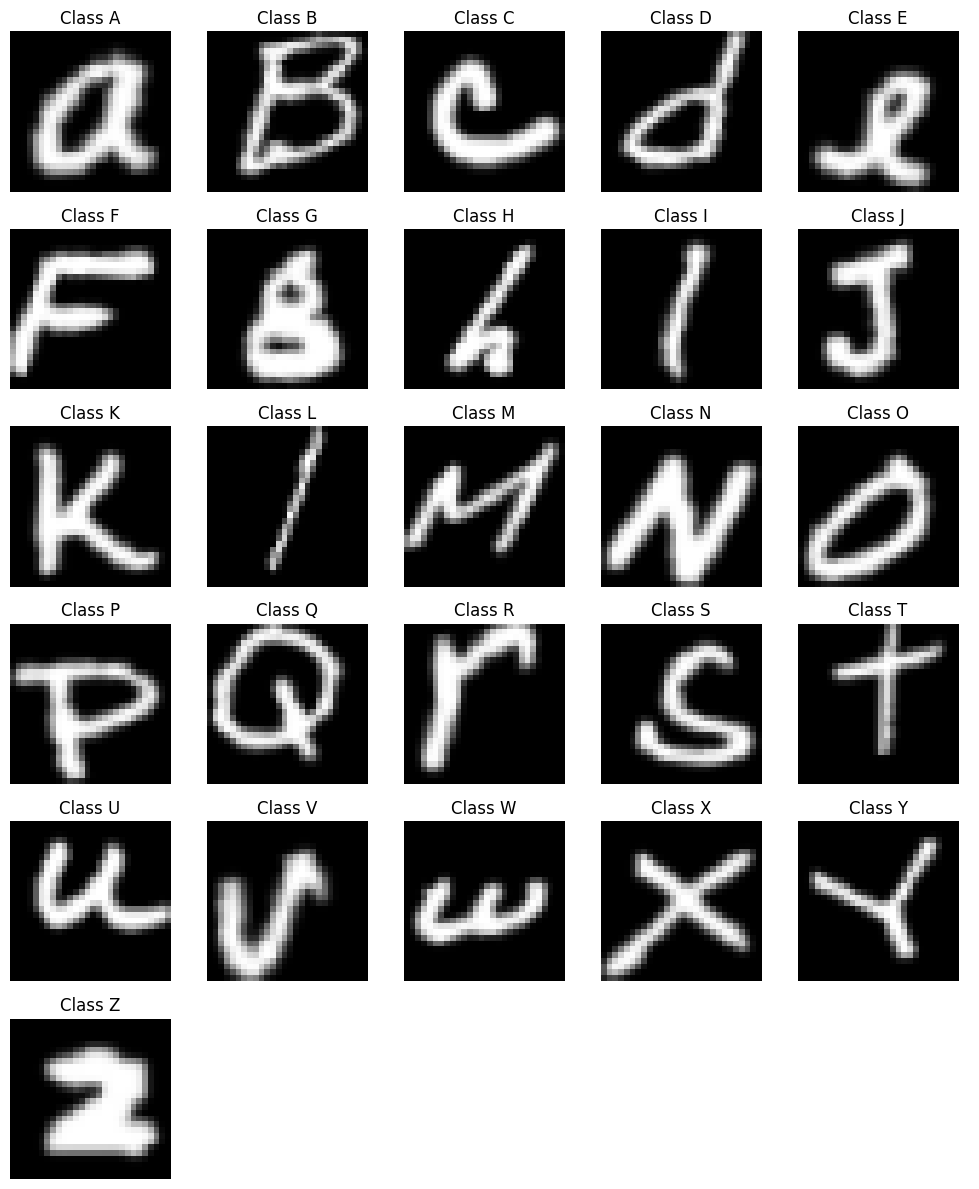

In [23]:
plot_random_images_per_class_from_dataframe(augmented_df, image_size=28, num_images_per_row=5)

### Add the augmented images back to the dataframe

In [24]:
# Create a dictionary to rename columns from their current names to 0 to 784
column_names = {old_name: new_name for old_name, new_name in zip(augmented_df.columns, range(len(augmented_df.columns)))}

# Rename the columns of augmented_df
augmented_df.rename(columns=column_names, inplace=True)
augmented_df

# Concatenate the dataframes (Normalized DF and Augmented DF)
preprocessed_df = pd.concat([normalized_df, augmented_df], axis=0, ignore_index=True)
preprocessed_df[0] = preprocessed_df[0].astype(int)
# Display the first few rows of the combined dataframe
preprocessed_df

0    1    2    3    4    5    6         7         8         9    ...  \
0       23  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
1        7  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
2       16  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
3       15  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
4       23  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
...    ...  ...  ...  ...  ...  ...  ...       ...       ...       ...  ...   
90995   26  0.0  0.0  0.0  0.0  0.0  0.0  0.000827  0.005563  0.024956  ...   
90996   26  0.0  0.0  0.0  0.0  0.0  0.0  0.000048  0.007343  0.027264  ...   
90997   26  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
90998   26  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   
90999   26  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  ...   

            775       776       777       778       779       780       781  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
90995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
90996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
90997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
90998  0.505231  0.427081  0.470765  0.544004  0.617243  0.689142  0.726672   
90999  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            782       783       784  
0      0.000000  0.000000  0.000000  
1      0.000000  0.000000  0.000000  
2      0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.000000  
4      0.000000  0.000000  0.000000  
...         ...       ...       ...  
90995  0.000000  0.000000  0.000000  
90996  0.000000  0.000000  0.000000  
90997  0.000000  0.000000  0.000000  
90998  0.410298  0.025538  0.000998  
90999  0.000000  0.000000  0.000000  

[91000 rows x 785 columns]

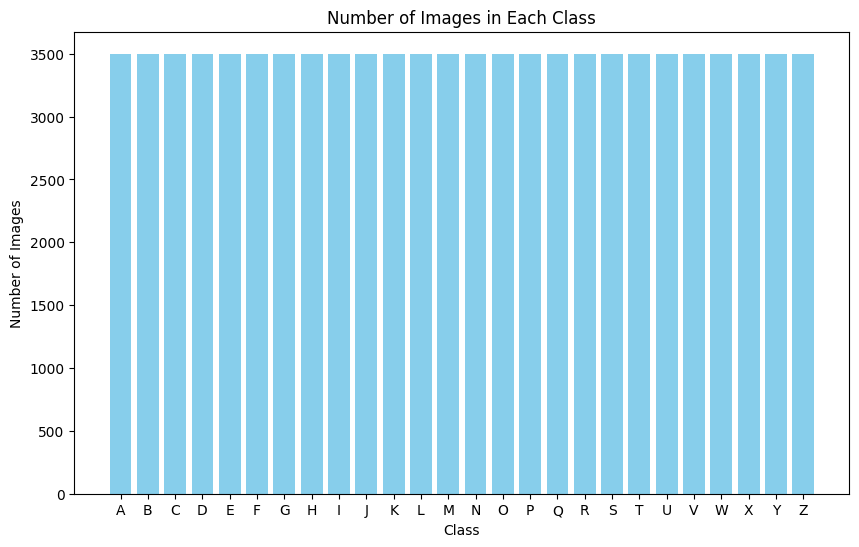

In [25]:
plot_class_distribution(preprocessed_df)

# Evaluation Metrics <a id = '6'></a>

## Loss (Generator Loss and Discriminator Loss) <a id = '6.1'></a>

In [26]:
def plot_losses(d_losses, g_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(d_losses)), d_losses, label="Discriminator loss")
    plt.plot(range(len(g_losses)), g_losses, label="Generator loss")
    plt.title("Training Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

## Accuracy (Discriminator Accuracy) <a id = '6.2'></a>

In [27]:
def plot_accuracy(d_accuracy):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(d_accuracy)), d_accuracy, label="Discriminator Accuracy")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Deep Convolutional GAN (DCGAN) <a id = '7'></a>

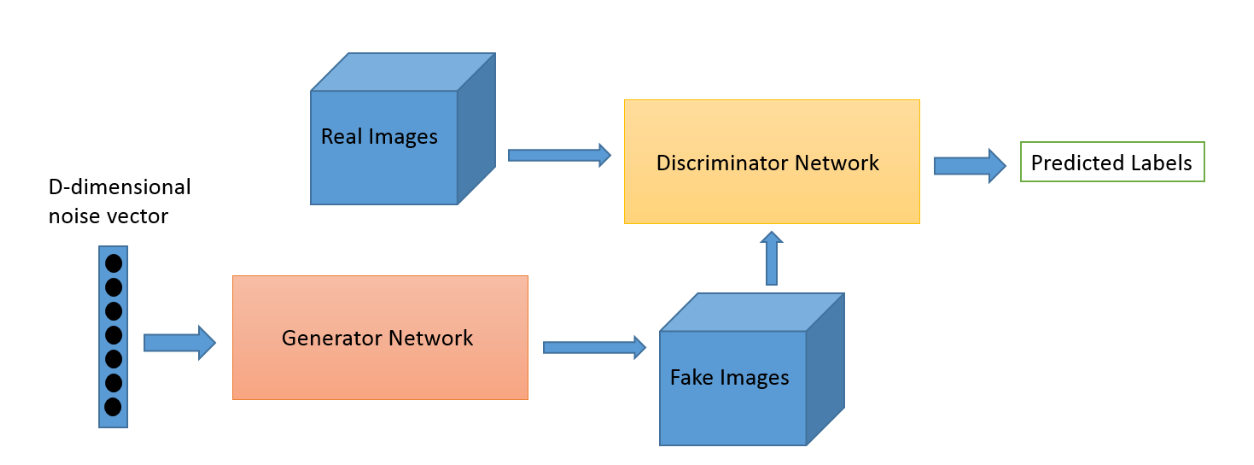

__What is Deep Convolutional GAN__

Deep Convolutional Generative Adversarial Network (DCGAN) is a type of GAN that leverages deep convolutional neural networks (CNNs) in both its generator and discriminator models.

__Main Components of Deep Convolutional GAN__

__Generator Network__
  - Input Layer

    The input layer accepts a noise vector (latent space) typically sampled from a normal distribution.

  - Dense Layer

    The dense layer transforms the noise vector into a higher-dimensional space

  - Reshape Layer

    The reshape layer reshapes the dense layer output into a 3D tensor (height, width, channels)

  - Upsampling Layer

    The upsampling layer increase the spatial dimensions of the input tensor (height and width) while keeping the number of channels the same

  - Convolutional Layer

    The convolutional layer apply convolutional filters to the upsampled tensor to generate feature maps. These layers help in refining the upsampled image and adding more details

  - Batch Normalization Layer

    The batch normalization layer normalize the outputs of the convolutional layers to improve training stability and performance

  - Activation Functions

    Activation functions introduce non-linearity to the network, allowing it to learn more complex patterns

__Discriminator Network__

  - Convolutional Layer

    The convolutional layer extract features from the input image. Each filter within the layer learns to detect specific patterns or features, such as edges, textures, shapes, or more complex structures, by convolving with the input data. Ultimately it converts the image into numerical values, allowing the neural network to interpret and extract relevant patterns

  - Leaky ReLU Activation
   
    The leaky ReLU activation introduce non-linearity into the network, allowing it to learn more complex patterns. The Leaky ReLU helps prevent the dying ReLU problem by allowing a small gradient when the unit is not active.

  - Dropout Layer

    The dropout layer prevent overfitting by randomly setting a fraction of input units to 0 during training. This forces the network to learn more robust features.

  - Flatten Layer

    Convert the 3D tensor output from the convolutional layers into a 1D vector, which can be fed into a dense layer

  - Dense Layer (Output)

    Perform the final classification by producing a single scalar output. This output is passed through a sigmoid activation function to produce a probability

__How Deep Convolutional GAN Works__

__The Training Process of Deep Convolutional GAN__

__References__

https://www.oreilly.com/content/deep-convolutional-generative-adversarial-networks-with-tensorflow/ 

https://jonathan-hui.medium.com/gan-dcgan-deep-convolutional-generative-adversarial-networks-df855c438f

## Base Model <a id = '7.1'></a>

In [28]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Flatten())
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
        
        
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Assuming your data is in a pandas DataFrame `df`
        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values  # assuming first column is labels, rest are pixels
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)  # reshape to image shape
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            
            # Train the discriminator (classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # ---------------------
            # Train Generator
            # ---------------------
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Train the generator (generator wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            # Print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/dcgan', exist_ok=True)
        os.makedirs('generated_images/dcgan/base', exist_ok=True)
        fig.savefig("generated_images/dcgan/base/dcgan_{:d}.png".format(epoch))
        plt.close()

In [32]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=3000, batch_size=256, save_interval=50)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)            

### Loss Curve

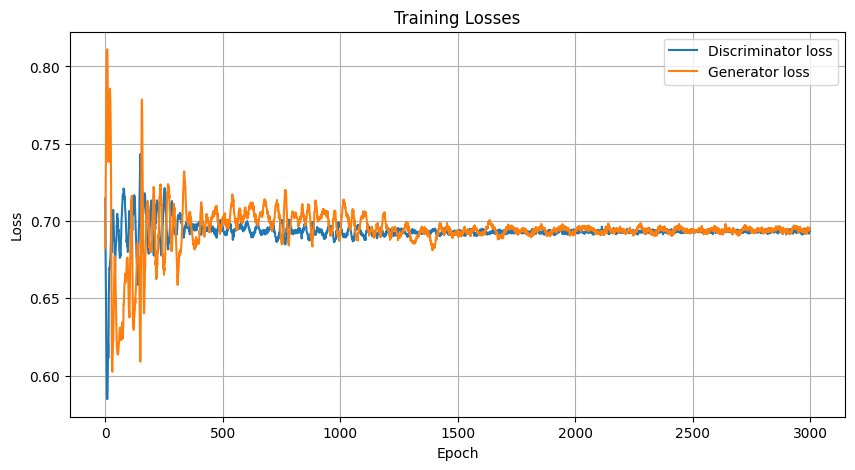

In [33]:
plot_losses(dcgan.d_losses, dcgan.g_losses)

### Accuracy Curve

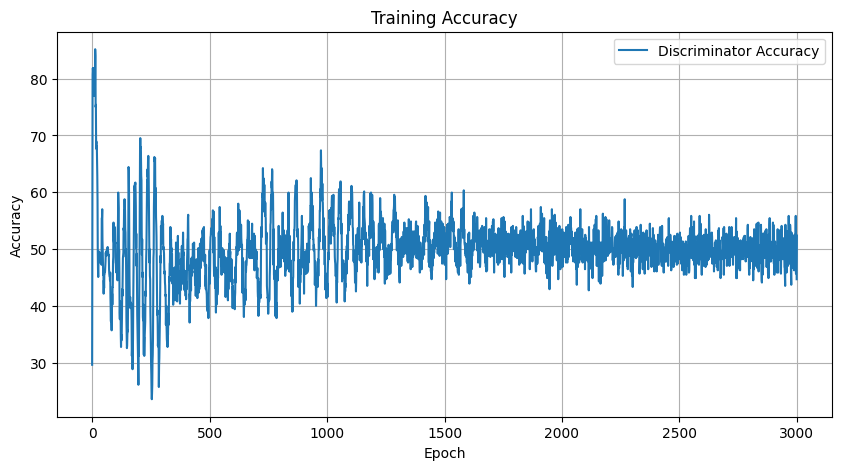

In [34]:
plot_accuracy(dcgan.d_accuracy)

### Generated Images at Different Epochs (Base Model)

At 100 Epochs

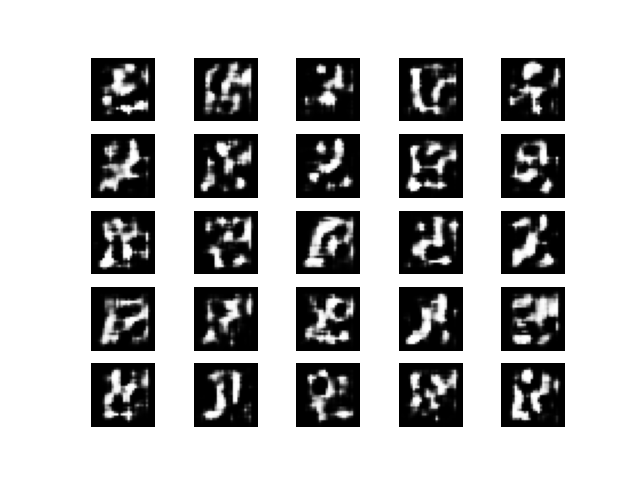

At 1000 Epochs

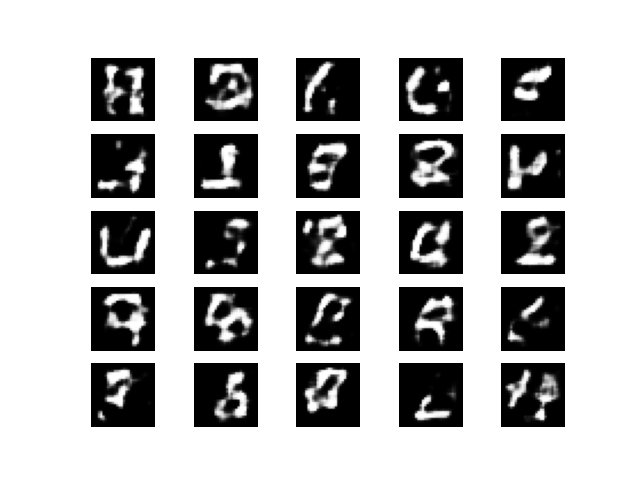

At 2950 Epochs

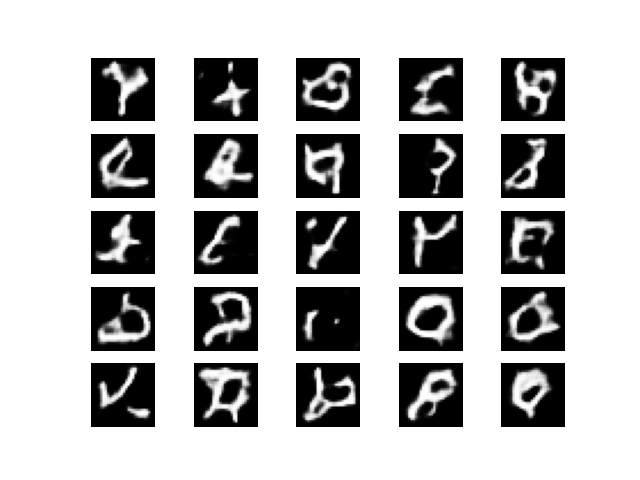

## Improving the Discriminator <a id = '7.2'></a>

In [32]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Flatten())
        
        # Add one more dense layer
        model.add(Dense(256))  # Adjust the units as per your architecture needs
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
        
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Assuming your data is in a pandas DataFrame `df`
        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values  # assuming first column is labels, rest are pixels
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)  # reshape to image shape
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            
            # Train the discriminator (classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # ---------------------
            # Train Generator
            # ---------------------
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Train the generator (generator wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            # Print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)


    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/dcgan', exist_ok=True)
        os.makedirs('generated_images/dcgan/improveD', exist_ok=True)
        fig.savefig("generated_images/dcgan/improveD/dcgan_{:d}.png".format(epoch))
        plt.close()

In [33]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=3000, batch_size=256, save_interval=50)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 256)       

### Loss Curve

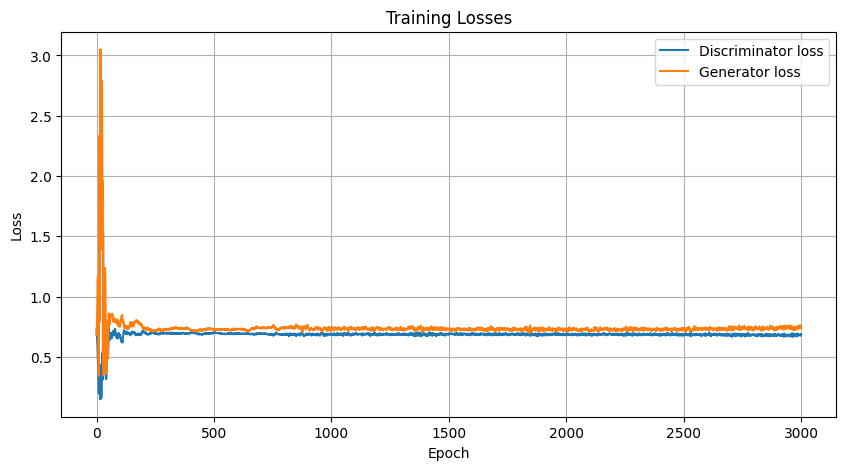

In [34]:
plot_losses(dcgan.d_losses, dcgan.g_losses)

### Accuracy Curve

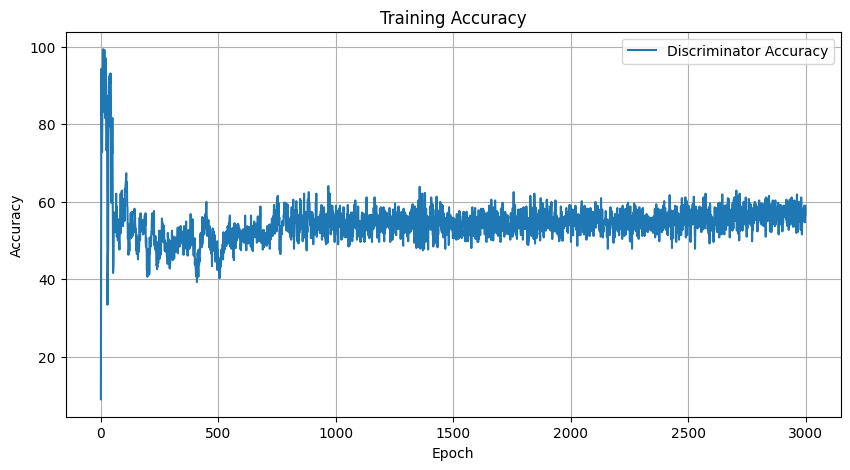

In [35]:
plot_accuracy(dcgan.d_accuracy)

### Generated Images at Different Epochs (Improving the Discriminator)

At 100 Epochs

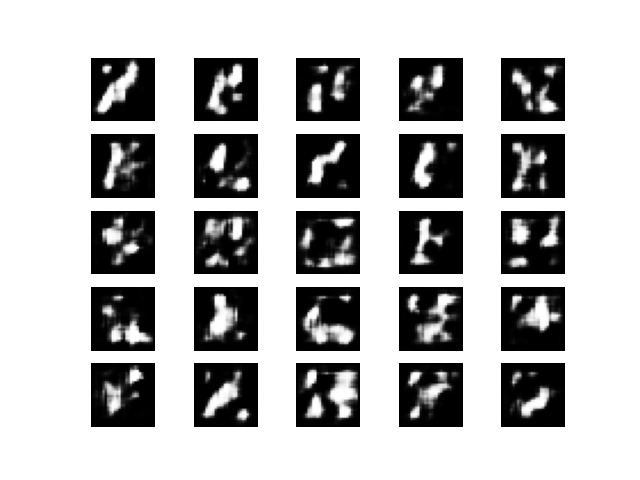

At 1000 Epochs

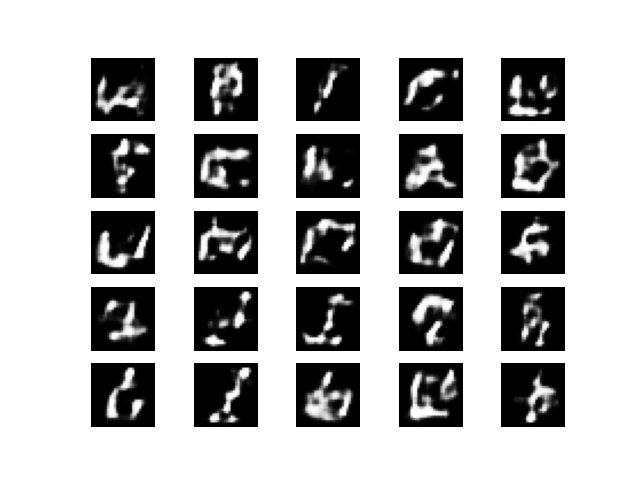

At 2950 Epochs

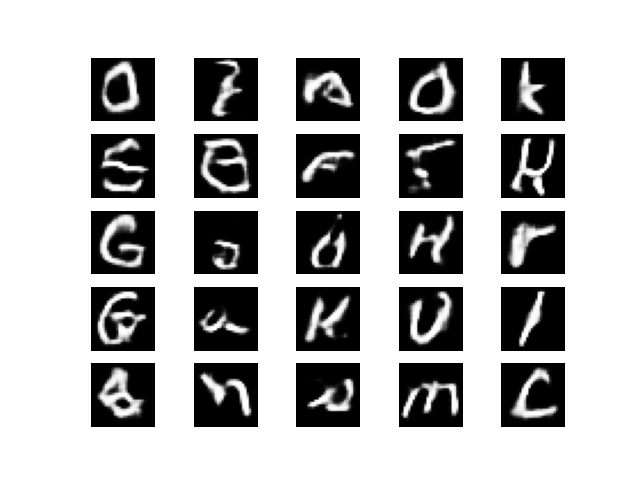


## Using ReLU for The Generator's Activation Function <a id = '7.3'></a>

In [36]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Flatten())
        
        # Add one more dense layer
        model.add(Dense(256))  # Adjust the units as per your architecture needs
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
        
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Assuming your data is in a pandas DataFrame `df`
        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values  # assuming first column is labels, rest are pixels
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)  # reshape to image shape
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            
            # Train the discriminator (classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # ---------------------
            # Train Generator
            # ---------------------
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Train the generator (generator wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            # Print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)


    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/dcgan', exist_ok=True)
        os.makedirs('generated_images/dcgan/generatorReLU', exist_ok=True)
        fig.savefig("generated_images/dcgan/generatorReLU/dcgan_{:d}.png".format(epoch))
        plt.close()

In [37]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=3000, batch_size=256, save_interval=50)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 256)       

### Plot Loss

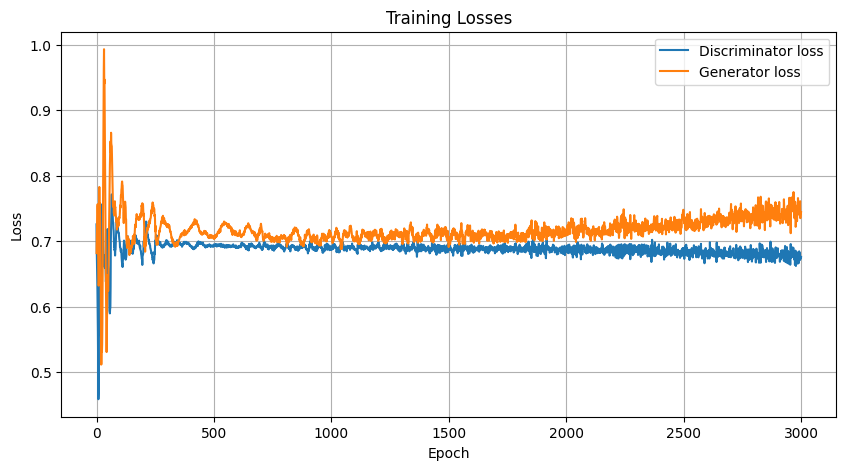

In [38]:
plot_losses(dcgan.d_losses, dcgan.g_losses)

### Plot Accuracy

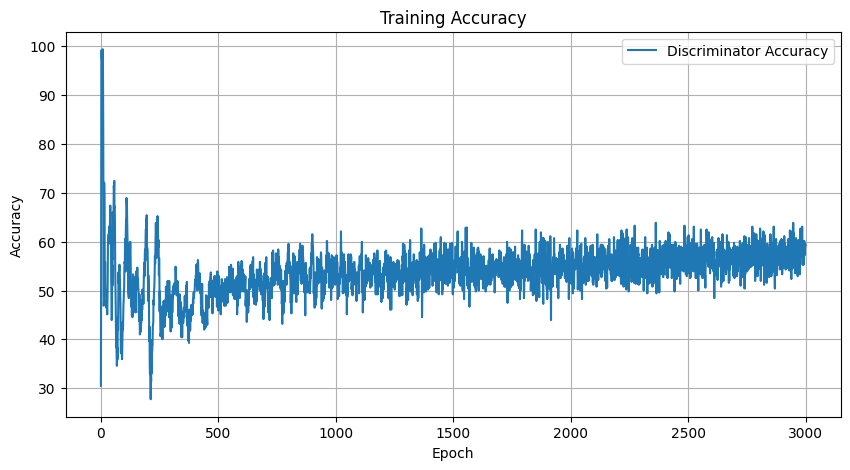

In [41]:
plot_accuracy(dcgan.d_accuracy)

### Generated Images at Different Epochs (Using ReLU for The Generator's Activation Function)

At 100 Epochs

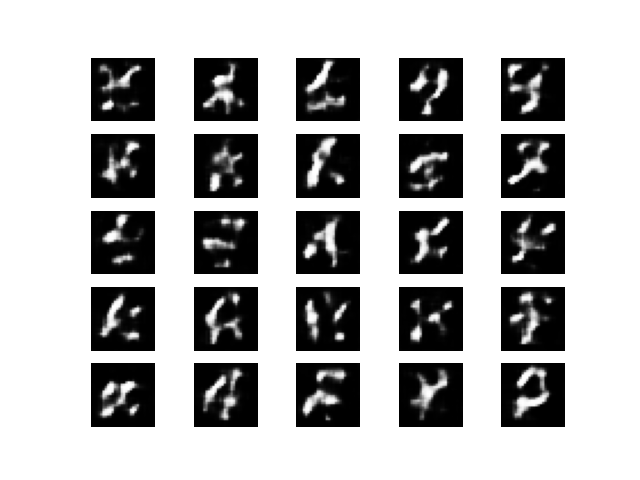

At 1000 Epochs

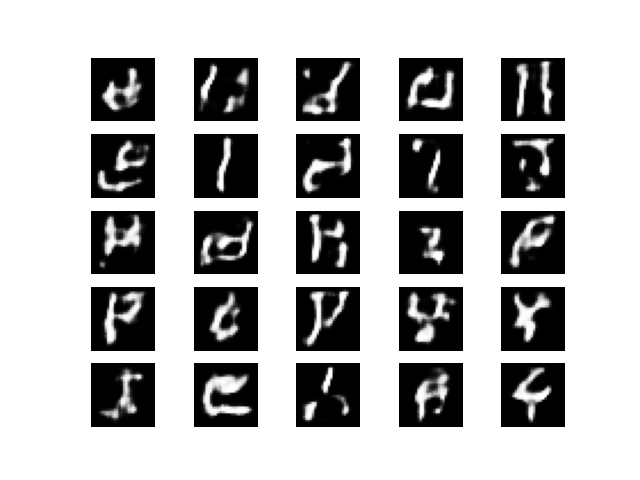

At 2950 Epochs

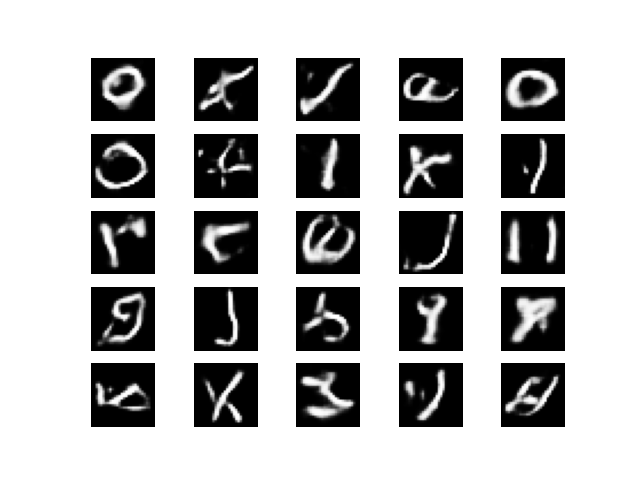

## Adding More Dense Units to The Generator <a id = '7.4'></a>

In [44]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Flatten())
        
        # Add one more dense layer
        model.add(Dense(256))  # Adjust the units as per your architecture needs
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
        
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []
        
    def train(self, epochs, batch_size=128, save_interval=50):
        # Assuming your data is in a pandas DataFrame `df`
        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values  # assuming first column is labels, rest are pixels
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)  # reshape to image shape
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            
            # Train the discriminator (classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # ---------------------
            # Train Generator
            # ---------------------
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Train the generator (generator wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            # Print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/dcgan', exist_ok=True)
        os.makedirs('generated_images/dcgan/generatorDenser', exist_ok=True)
        fig.savefig("generated_images/dcgan/generatorDenser/dcgan_{:d}.png".format(epoch))
        plt.close()

In [45]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=3000, batch_size=256, save_interval=50)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 256)       

### Plot Loss

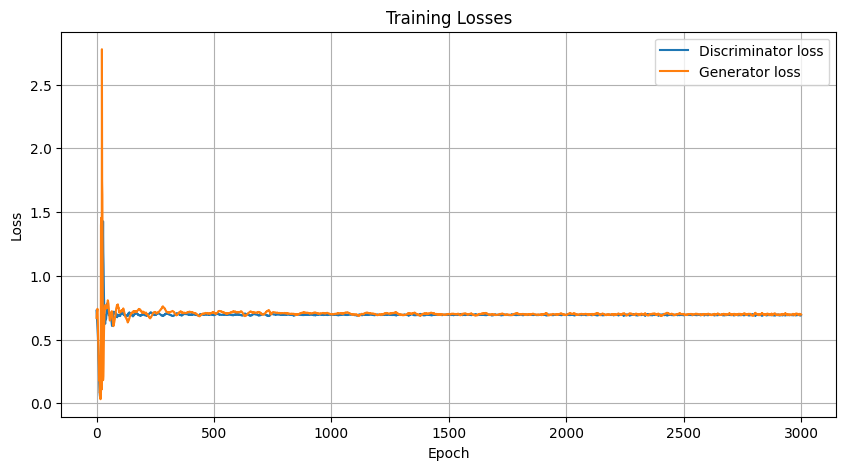

In [46]:
plot_losses(dcgan.d_losses, dcgan.g_losses)

### Plot Accuracy

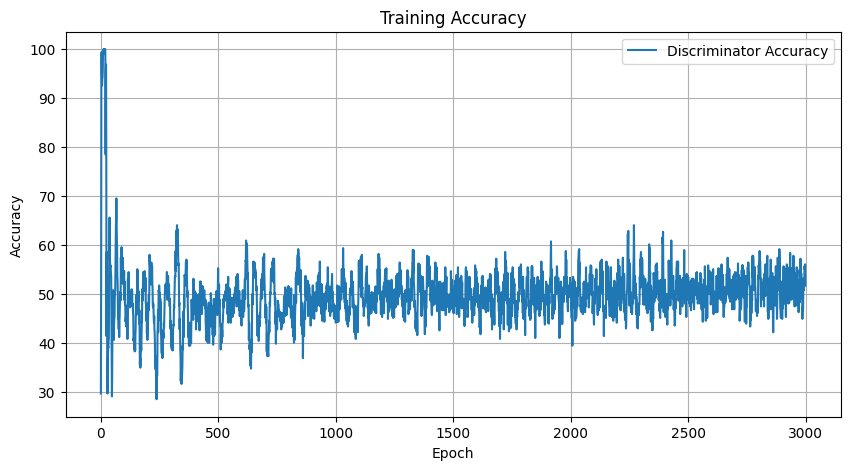

In [47]:
plot_accuracy(dcgan.d_accuracy)

### Generated Images at Different Epochs (Adding More Dense Units to The Generator)

At 100 Epochs

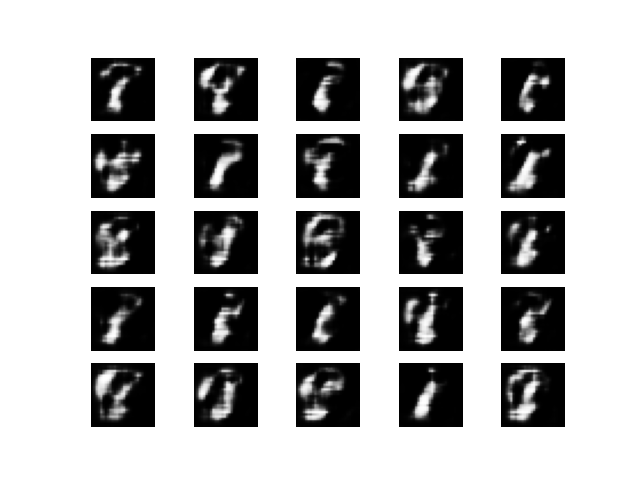

At 1000 Epochs

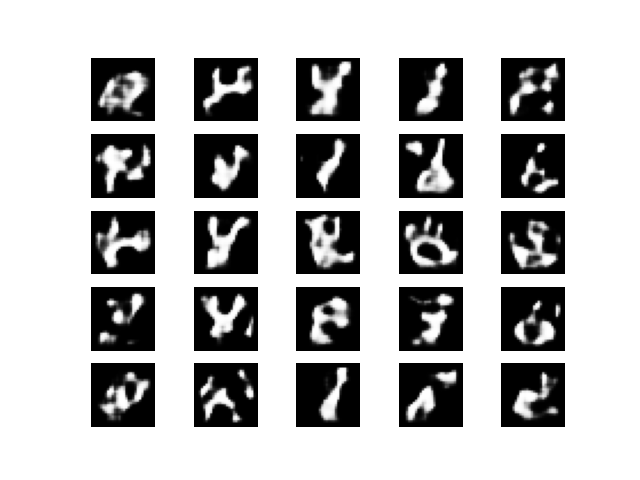

At 2950 Epochs

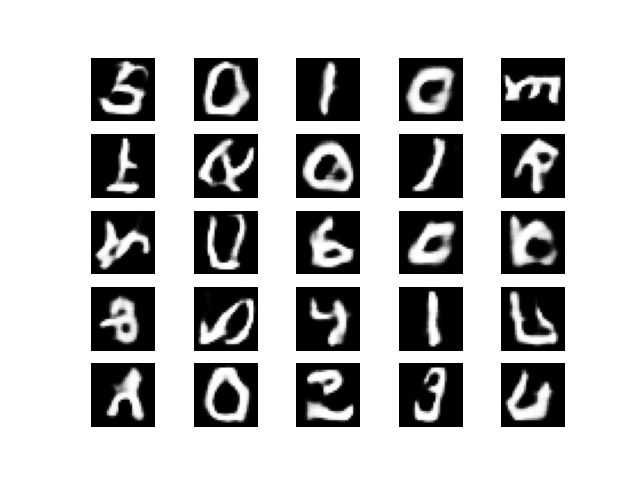

At 9950 Epochs

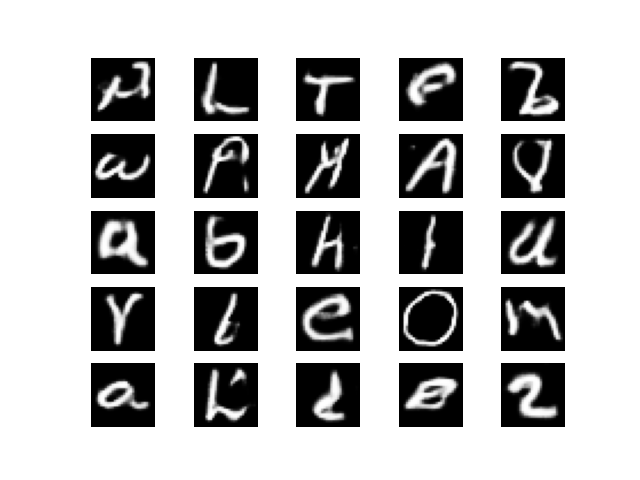

# Conditional GAN <a id = '8'></a>

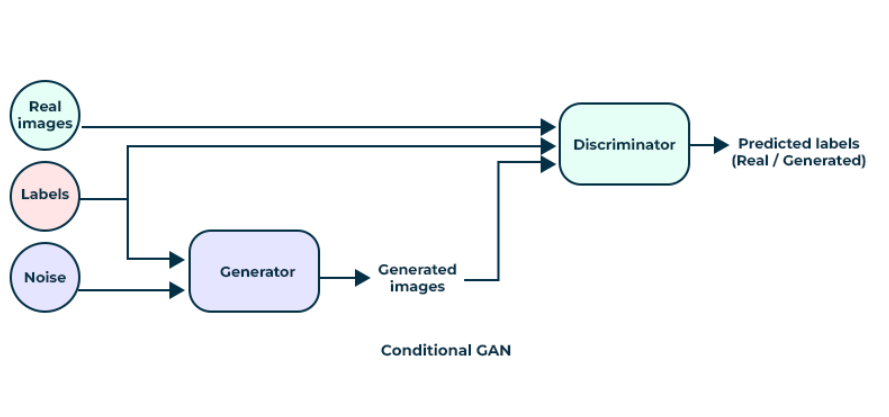

Explantion
- CGANs is a type of Generative Adversarial Network that adds additional information into both the generator and the discriminator to condition the generation process. This additional information can be any type of label or structured data such as class labels, images or other data that helps the generation process.
- It allows the generator to create more controlled and contextually appropriate outputs by using the additional information given to it.

Difference between CGANs and DCGANs
- CGANs uses additional information as conditions into the generation process while DCGANs focus on using convolutional networks for better performance in image data.
- CGANs are used for tasks that need controlled generated based on the input conditions while DCGANs are used for generating high-quality, realistic images.
- CGANs defining feature is the conditioning mechanism while DCGANs specifically use deep convolutional networks for both the generator and discriminator, emphasizing the architecture rather than conditioning.

__References__

https://medium.com/analytics-vidhya/dcgan-cgan-and-sagan-the-cifar-10-dataset-206cbb851327

https://www.geeksforgeeks.org/conditional-generative-adversarial-network/

## Base Model <a id = '8.1'></a>

In [29]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Flatten())

        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/base', exist_ok=True)
        fig.savefig("generated_images/cgan/base/cgan_{:d}.png".format(epoch))
        plt.close()

In [30]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                        

KeyboardInterrupt: 

### Plot Loss

In [ ]:
plot_losses(cgan.d_losses, cgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(cgan.d_accuracy)

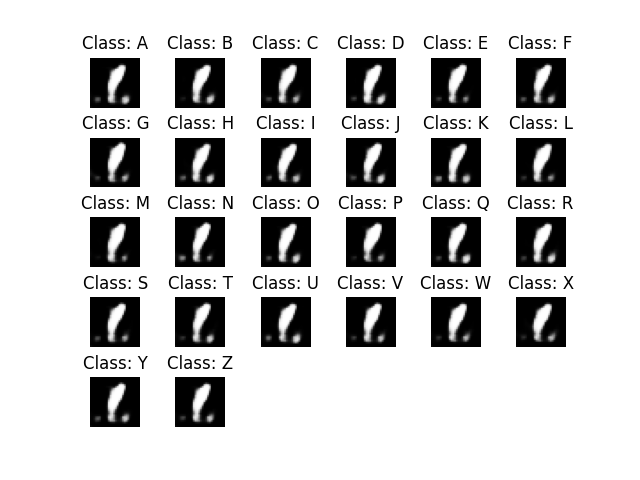

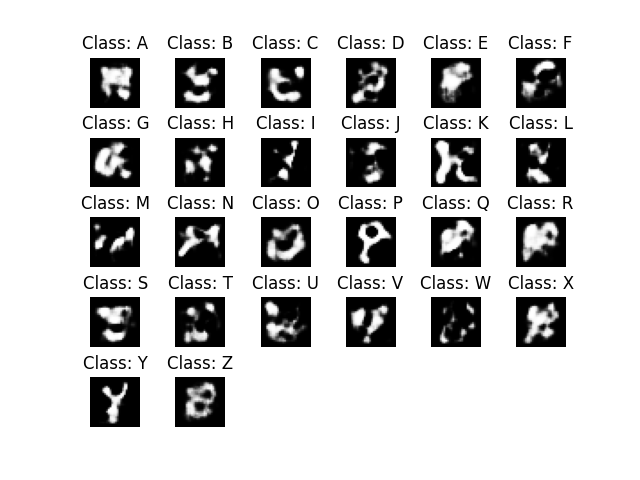

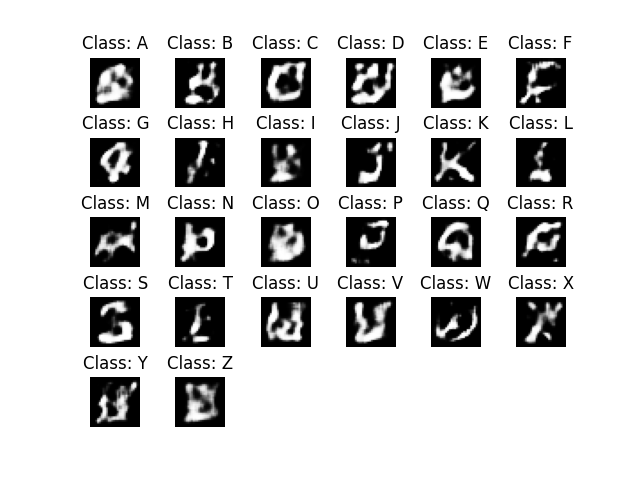

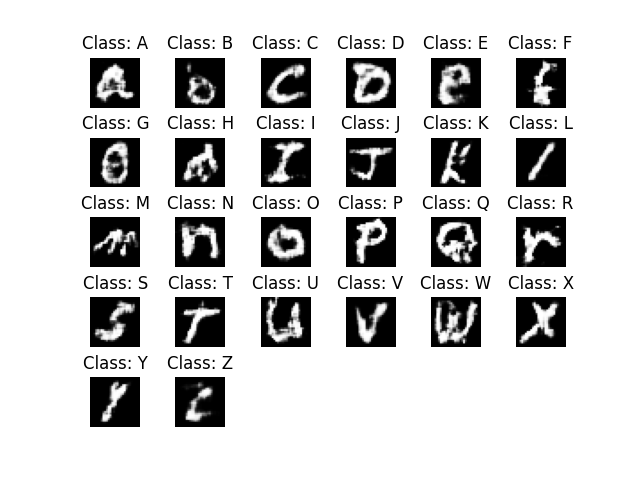

## Decreasing Leaky Relu Alpha Value<a id = '8.2'></a>

In [40]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Flatten())

        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/decreaseLReLU', exist_ok=True)
        fig.savefig("generated_images/cgan/decreaseLReLU/cgan_{:d}.png".format(epoch))
        plt.close()

In [41]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_11 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                     

### Plot Loss

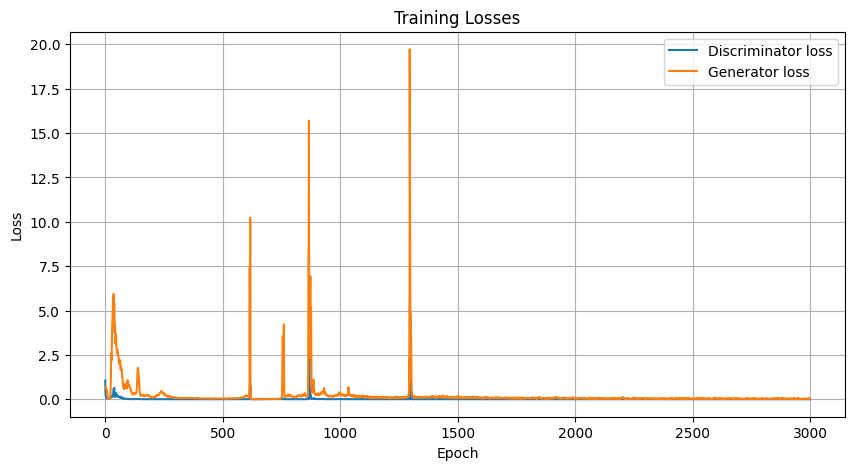

In [42]:
plot_losses(cgan.d_losses, cgan.g_losses)

### Plot Accuracy

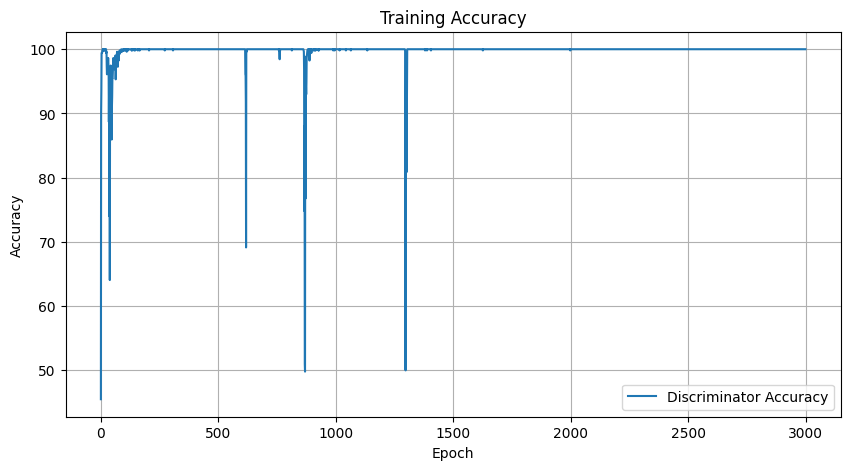

In [43]:
plot_accuracy(cgan.d_accuracy)

## Increase ADAM Value <a id = '8.3'></a>

In [44]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.01))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Flatten())

        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/increaseAdam', exist_ok=True)
        fig.savefig("generated_images/cgan/increaseAdam/cgan_{:d}.png".format(epoch))
        plt.close()

In [45]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_17 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                     

### Plot Loss

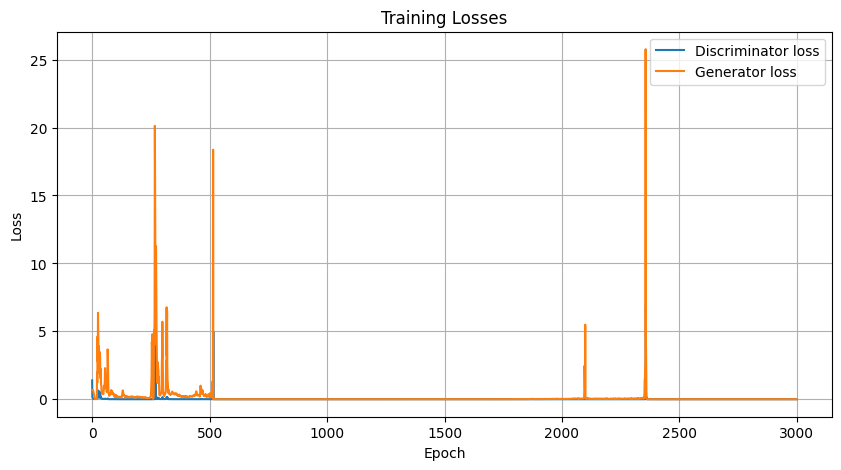

In [46]:
plot_losses(cgan.d_losses, cgan.g_losses)

### Plot Accuracy

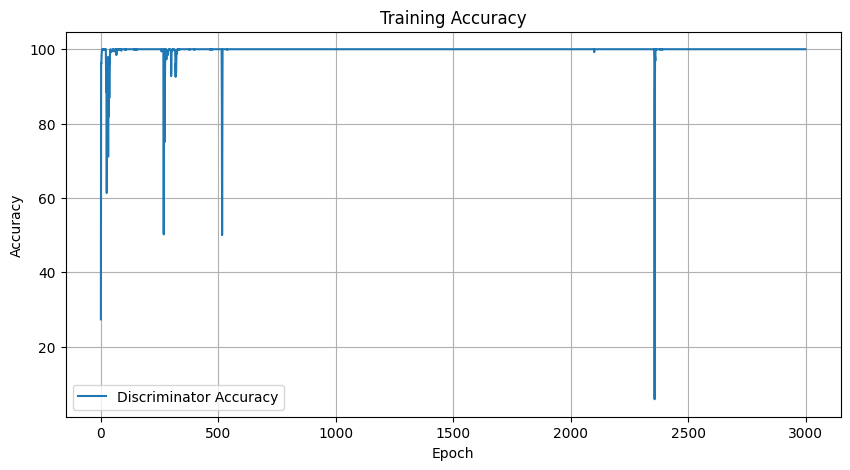

In [47]:
plot_accuracy(cgan.d_accuracy)

## Remove Batch Notrmalization Layer <a id = '8.4'></a>

In [48]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))
        
        model.add(Flatten())
        
        # Add one more dense layer
        #model.add(Dense(256))  # Adjust the units as per your architecture needs
        #model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/removeBatch', exist_ok=True)
        fig.savefig("generated_images/cgan/removeBatch/cgan_{:d}.png".format(epoch))
        plt.close()

In [49]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 4, 4, 256)         0         
                                                                 
 flatten_11 (Flatten)        (None, 4096)             

KeyboardInterrupt: 

### Plot Loss

In [ ]:
plot_losses(cgan.d_losses, cgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(cgan.d_accuracy)

## Add more layers to the discriminator <a id = '8.5'></a>

In [31]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))
        
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.01))
        #model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))  # New layer
        model.add(LeakyReLU(alpha=0.01))
        
        model.add(Flatten())
        
        # Add one more dense layer
        #model.add(Dense(256))  # Adjust the units as per your architecture needs
        #model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/moreLayerD', exist_ok=True)
        fig.savefig("generated_images/cgan/moreLayerD/cgan_{:d}.png".format(epoch))
        plt.close()

In [32]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 4, 4, 256)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 256)        

### Plot Loss

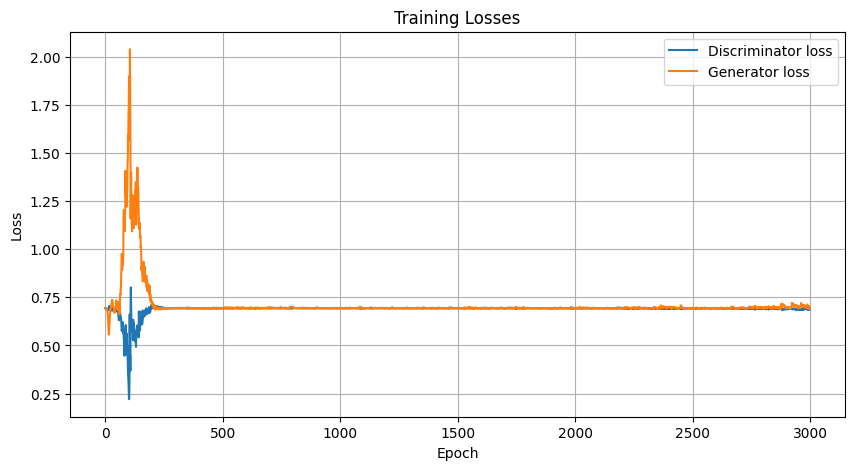

In [33]:
plot_losses(cgan.d_losses, cgan.g_losses)

### Plot Accuracy

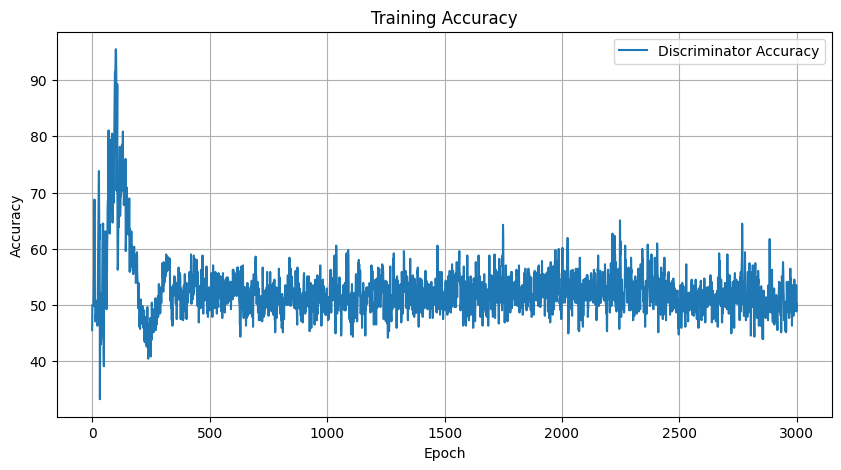

In [34]:
plot_accuracy(cgan.d_accuracy)

### Images at each epochs

0 Epochs

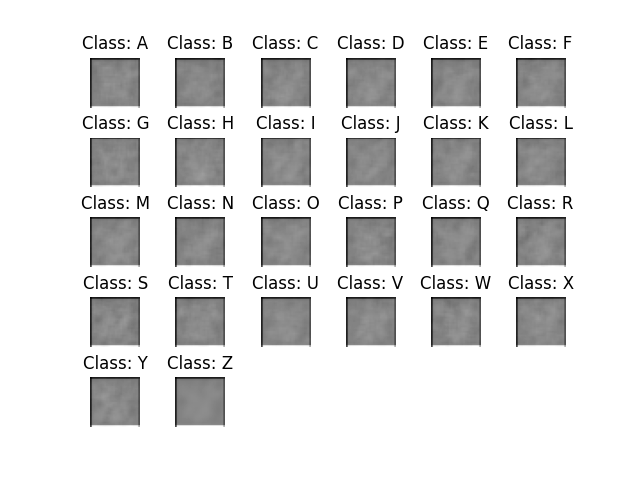

100 Epochs

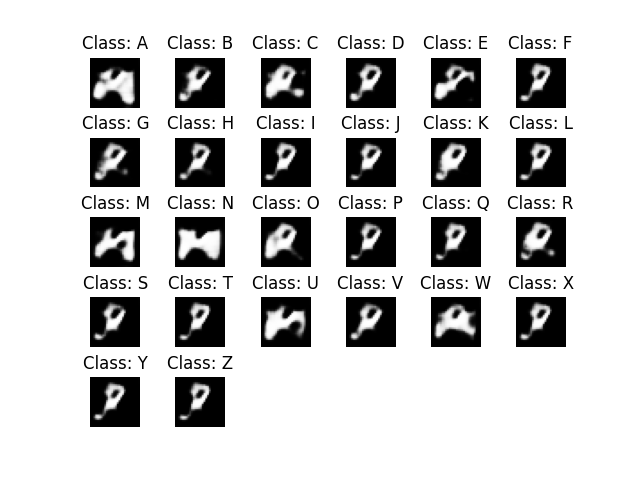

1000 Epochs

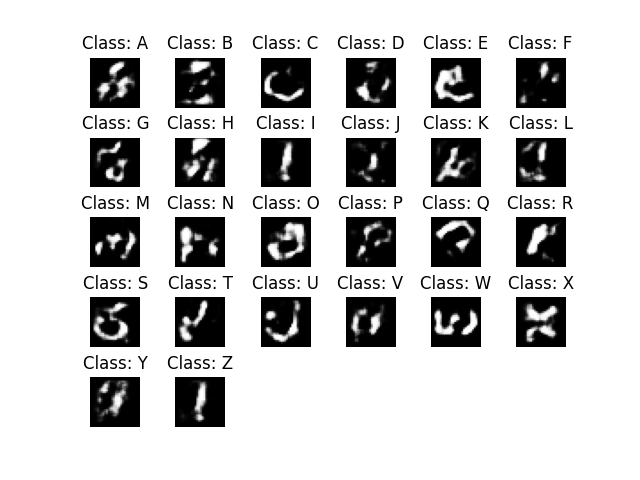

2950 Epochs

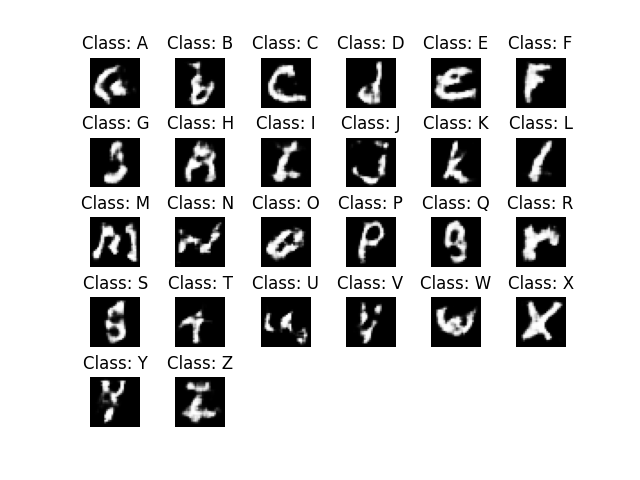

7550 Epochs

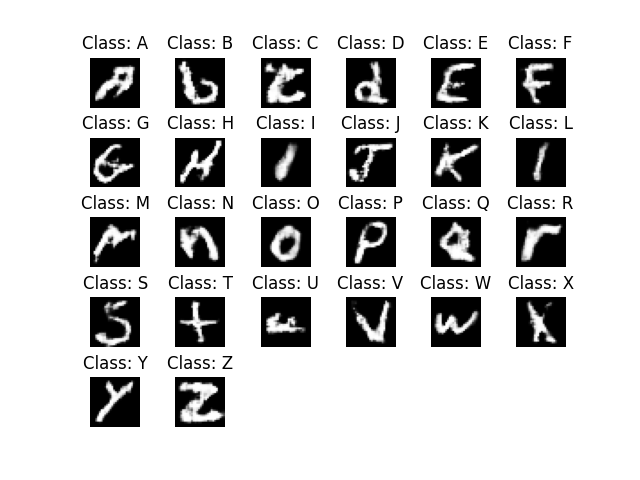

9950 Epochs

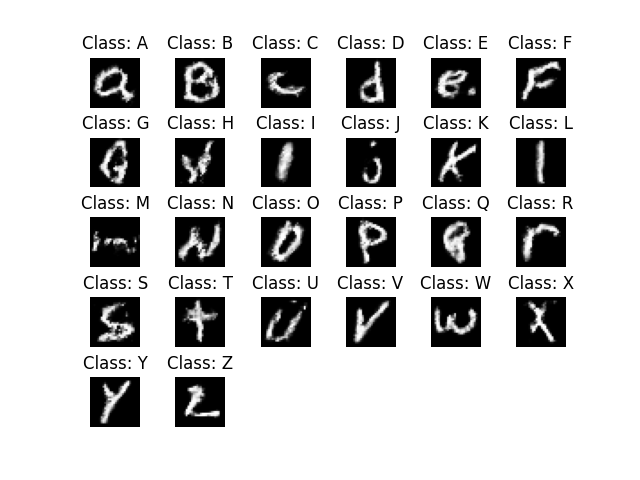

## Adding More Dense Units to The Generator

In [39]:
from keras.layers import InputLayer, Embedding, Flatten, multiply, Conv2D, LeakyReLU, Dropout, Dense, Flatten, Input
class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 26
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def build_generator(self):

        model = Sequential()

        model.add(Dense(7 * 7 * 1500, input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))

        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(self.channels, kernel_size=3, activation='sigmoid', padding='same'))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = multiply([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):
        model = Sequential()

        # Image input
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Flatten())

        # Dense layer
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        
        # Output layer
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        # Image input and label input
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        # Embedding for label
        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        label_embedding = Dense(np.prod(self.img_shape))(label_embedding)
        label_embedding = Reshape(self.img_shape)(label_embedding)

        # Multiply image and label embeddings
        combined = multiply([img, label_embedding])

        # Validity prediction
        validity = model(combined)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):


        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]
            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels (Generate random samples)
            sampled_labels = np.random.randint(1, 27, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 6
        num_samples = 26
        # Generate noise based on the number of samples
        noise = np.random.normal(0, 1, (num_samples, 100))
        sampled_labels = np.arange(1, 27).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0  # Counter for the images
        for i in range(r):
            for j in range(c):
                if cnt < num_samples:  # Ensure we don't go out of bounds
                    axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')  # Display image

                    mapped_label = map_labels(sampled_labels[cnt][0])  # Map label to its corresponding class name
                    axs[i,j].set_title("Class: %s" % mapped_label)  # Set title of the subplot
                    axs[i,j].axis('off')  # Turn off axis
                    cnt += 1  # Increment counter
                else:
                    axs[i,j].axis('off')  # Turn off axis if there's no image to display
                    
        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.2, hspace=0.6)
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/cgan', exist_ok=True)
        os.makedirs('generated_images/cgan/denser', exist_ok=True)
        fig.savefig("generated_images/cgan/denser/cgan_{:d}.png".format(epoch))
        plt.close()

In [40]:
cgan = CGAN()
cgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 4, 4, 256)         0         
                                                                 
 flatten_9 (Flatten)         (None, 4096)             

### Plot Accuracy

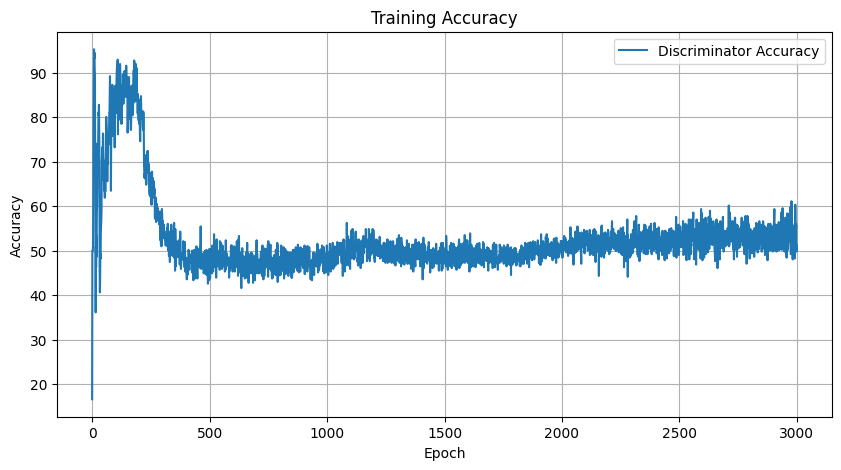

In [41]:
plot_accuracy(cgan.d_accuracy)

### Plot Loss

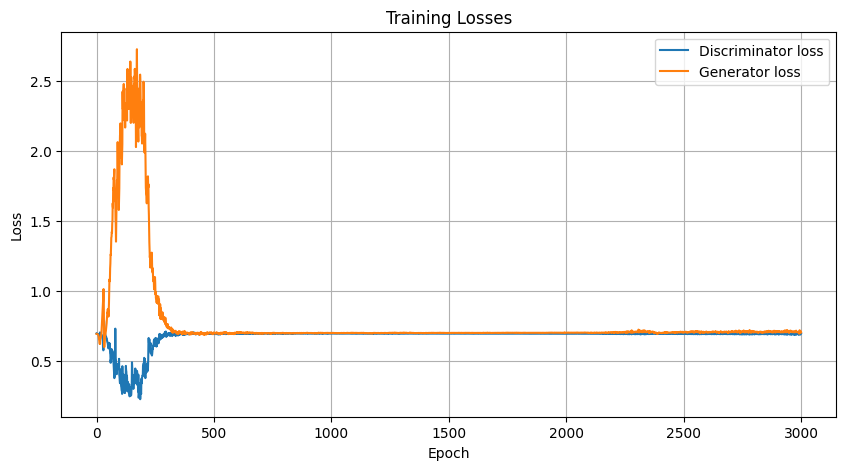

In [42]:
plot_losses(cgan.d_losses, cgan.g_losses)

# Wasserstein GAN <a id = '8'></a>

## Base Model <a id = '8.1'></a>

In [43]:
from keras.layers import Conv2D, Dropout, BatchNormalization, LeakyReLU, ZeroPadding2D
from keras import backend as K

class WGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.00005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise)

                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)


            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/wgan', exist_ok=True)
        os.makedirs('generated_images/wgan/base', exist_ok=True)
        fig.savefig("generated_images/wgan/base/wgan_{:d}.png".format(epoch))
        plt.close()

In [ ]:
wgan = WGAN()
wgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 16)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_13 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                     

### Plot Loss

In [ ]:
plot_losses(wgan.d_losses, wgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(wgan.d_accuracy)

## Base removing dropout and batchnormalization from critic

In [52]:
from keras.layers import Dense, Reshape, UpSampling2D, Activation, Input, Conv2D, Dropout, BatchNormalization, LeakyReLU, ZeroPadding2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K

class WGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.00005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("sigmoid"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise)

                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)

            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/wgan', exist_ok=True)
        os.makedirs('generated_images/wgan/rmvBatchDropout', exist_ok=True)
        fig.savefig("generated_images/wgan/rmvBatchDropout/wgan_{:d}.png".format(epoch))
        plt.close()

In [ ]:
wgan = WGAN()
wgan.train(epochs=3000, batch_size=256, sample_interval=50)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 14, 14, 16)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 8, 8, 32)          0         
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 64)          18496     
                                                      

### Plot Loss

In [ ]:
plot_losses(wgan.d_losses, wgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(wgan.d_accuracy)

## Base using Tanh on [-1,1] normalization

In [ ]:
from keras.layers import Dense, Reshape, UpSampling2D, Activation, Input, Conv2D, Dropout, BatchNormalization, LeakyReLU, ZeroPadding2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K

class WGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.00005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train * 2.0 - 1.0  # Scale to [-1, 1]
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise)

                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)
                    
            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss[0])
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss[1])
            
            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/wgan', exist_ok=True)
        os.makedirs('generated_images/wgan/tanh', exist_ok=True)
        fig.savefig("generated_images/wgan/tanh/wgan_{:d}.png".format(epoch))
        plt.close()

In [ ]:
wgan = WGAN()
wgan.train(epochs=3000, batch_size=256, sample_interval=50)

### Plot Loss

In [ ]:
plot_losses(wgan.d_losses, wgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(wgan.d_accuracy)

## WGAN with Gradient Penalty

In [ ]:
from keras.layers import Dense, Reshape, UpSampling2D, Activation, Input, Conv2D, Dropout, BatchNormalization, LeakyReLU, ZeroPadding2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K

class WGANGP():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        self.batch_size  = 256
        self.lambda_gp = 10

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.00005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Loss function
        self.d_losses = []
        self.g_losses = []
        # Accuracy
        self.d_accuracy = []

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def gradient_penalty_loss(self, real_imgs, gen_imgs):
        # Generate interpolated samples
        alpha = K.random_uniform((self.batch_size, 1, 1, 1))
        interpolated = alpha * real_imgs + (1 - alpha) * gen_imgs
    
        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            interpolated_output = self.critic(interpolated)
    
        gradients = tape.gradient(interpolated_output, interpolated)[0]
        gradients_sqr = K.square(gradients)
        gradient_penalty = K.sum(gradients_sqr, axis=np.arange(1, len(gradients_sqr.shape)))
        gradient_penalty = K.sqrt(gradient_penalty)
        gradient_penalty = K.mean(K.square(gradient_penalty - 1))
    
        return gradient_penalty

    def build_generator(self):

        model = Sequential()

        model.add(Dense(1500 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 1500)))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Extract image data and convert to numpy array
        X_train = preprocessed_df.iloc[:, 1:].values
        y_train = preprocessed_df.iloc[:, 0].values
        X_train = X_train * 2.0 - 1.0  # Scale to [-1, 1]
        X_train = X_train.reshape(-1, self.img_rows, self.img_cols, self.channels)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                
                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise)
                
                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake)
                
                # Extract the loss values from the lists
                d_loss_real = np.mean(d_loss_real)
                d_loss_fake = np.mean(d_loss_fake)
                
                # Compute gradient penalty
                gradient_penalty = self.gradient_penalty_loss(imgs, gen_imgs)
                
                # Total critic loss
                d_loss = d_loss_fake - d_loss_real + self.lambda_gp * gradient_penalty
                
                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)

            # Store losses
            self.d_losses.append(d_loss)
            self.g_losses.append(g_loss)
            # Store accuracy
            self.d_accuracy.append(100 * d_loss)
            
            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss, 1 - g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_images', exist_ok=True)
        os.makedirs('generated_images/wgan', exist_ok=True)
        os.makedirs('generated_images/wgan/addGP', exist_ok=True)
        fig.savefig("generated_images/wgan/addGP/wgan_{:d}.png".format(epoch))
        plt.close()

In [ ]:
wgangp = WGANGP()
wgangp.train(epochs=10, batch_size=256, sample_interval=50)

### Plot Loss

In [ ]:
plot_losses(wgan.d_losses, wgan.g_losses)

### Plot Accuracy

In [ ]:
plot_accuracy(wgan.d_accuracy)

# Final Model

# TESTING TESTING LOL 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.linalg import sqrtm

# Define a simple CNN for grayscale images
def create_feature_extractor():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),  # Output features of size 128
    ])
    return model

# Calculate the FID score
def calculate_fid(model, real_images, generated_images):
    # Scale images to the range [0, 1]
    real_images = real_images.astype('float32') / 255.0
    generated_images = generated_images.astype('float32') / 255.0
    
    # Extract features
    real_features = model.predict(real_images)
    gen_features = model.predict(generated_images)
    
    # Calculate mean and covariance statistics
    mu1, sigma1 = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu2, sigma2 = gen_features.mean(axis=0), np.cov(gen_features, rowvar=False)
    
    # Calculate FID
    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# Load your real and generated images
# Assuming `real_images` and `generated_images` are numpy arrays of shape (num_images, 28, 28, 1)
real_images = np.load('path_to_real_images.npy')
generated_images = np.load('path_to_generated_images.npy')

# Create the feature extractor model
feature_extractor = create_feature_extractor()

# Calculate the FID score
fid_score = calculate_fid(feature_extractor, real_images, generated_images)
print(f'FID score: {fid_score}')
